<h1 style="background-color:skyblue; color:black; text-align:center; font-family:serif; font-size:45px"><b r><br>
    Predict Bike Rental Counts<br><br>
    <h4 style="background-color:skyblue; text-align:right; font-family:serif; font-size:18px"><b r><em><font color='darkred'>
        -By Ketaki Kulkarni<br></font></em>

<h1 style="font-family:serif; font-size:35px"> <b r>
    PROBLEM STATEMENT:</h1>
<h3 style="font-family:serif; font-size:16px">
<ol>
    <li>Nowadays, the demand for car-sharing services like Uber, Lyft, etc. has been at the peak, similarly there are bike-sharing services that gained demand in many countries during the past decade. In bike-sharing systems, the entire process from membership to rental and return has been automated. Using these systems, users can easily rent a bike from one location and return it to another. </li> <br>
    <li>Heavy street traffic in busy cities and a desire for a two-wheeler transportation makes biking an attractive alternative to traveling by car. A limited supply of bikes, increasing demand for bikes, cost of storage and relocation of bikes serve as motivation for forecasting the demand of bikes. So, that calls for prediction of demand of ridesharing systems and the companies concerned. This project examines the daily bike rental data with weather, date, season and other information spanning 2 years 2011 and 2012.</li>

</ol>
</h3>

<h3 style="font-family:serif"> <b r>
    Loading the required libraries

In [1]:
library(corrplot)
library(ggplot2)
library(dplyr)
library(rcompanion)
library(mlr)
library(caTools)
library(MASS)
library(Metrics)
library(randomForest)

corrplot 0.92 loaded


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: ParamHelpers

Warning message: 'mlr' is in 'maintenance-only' mode since July 2019.
Future development will only happen in 'mlr3'
(<https://mlr3.mlr-org.com>). Due to the focus on 'mlr3' there might be
uncaught bugs meanwhile in {mlr} - please consider switching.


Attaching package: 'MASS'


The following object is masked from 'package:dplyr':

    select



Attaching package: 'Metrics'


The following object is masked from 'package:rcompanion':

    accuracy


randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:dplyr':

    combine


The following object is masked from 'package:ggplot2':

    margin




<h3 style="font-family:serif"> <b r>
    Loading the data

In [2]:
data <- read.csv("1657875746_day.csv", header = TRUE)

In [3]:
head(data)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,1,01-01-2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.1604460,331,654,985
2,2,02-01-2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.2485390,131,670,801
3,3,03-01-2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.2483090,120,1229,1349
4,4,04-01-2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.1602960,108,1454,1562
5,5,05-01-2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.1869000,82,1518,1600
6,6,06-01-2011,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.0895652,88,1518,1606


<h3 style="font-family:serif"> <b r>
    Basic Information of the Data

In [4]:
sprintf('There are %s rows (i.e. observations) and %s columns (i.e. variables) in the Bike data', dim(data)[1], dim(data)[2])

[1] "There are 731 rows (i.e. observations) and 16 columns (i.e. variables) in the Bike data"

In [5]:
str(data)

'data.frame':	731 obs. of  16 variables:
 $ instant   : int  1 2 3 4 5 6 7 8 9 10 ...
 $ dteday    : chr  "01-01-2011" "02-01-2011" "03-01-2011" "04-01-2011" ...
 $ season    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ yr        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ mnth      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ holiday   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ weekday   : int  6 0 1 2 3 4 5 6 0 1 ...
 $ workingday: int  0 0 1 1 1 1 1 0 0 1 ...
 $ weathersit: int  2 2 1 1 1 1 2 2 1 1 ...
 $ temp      : num  0.344 0.363 0.196 0.2 0.227 ...
 $ atemp     : num  0.364 0.354 0.189 0.212 0.229 ...
 $ hum       : num  0.806 0.696 0.437 0.59 0.437 ...
 $ windspeed : num  0.16 0.249 0.248 0.16 0.187 ...
 $ casual    : int  331 131 120 108 82 88 148 68 54 41 ...
 $ registered: int  654 670 1229 1454 1518 1518 1362 891 768 1280 ...
 $ cnt       : int  985 801 1349 1562 1600 1606 1510 959 822 1321 ...


<h3 style="font-family:serif"> <b r>
    Handling Missing Values

In [6]:
sprintf("There are %s missing values in the dataset", sum(is.na(data)))

[1] "There are 0 missing values in the dataset"

<h3 style="font-family:serif; font-size:26px"> <b r><br><br>
    OBSERVATIONS:</h3>
<h4 style="font-family:serif; font-size:16px"> 
<ol>
<li>There are many variables in the dataset and the type of those variables is listed above. Note that they all are not in an organized format.</li><br>
<li>The variable 'season' has an integer data type and has observations ranging from 1 to 4, rather than displaying the seasons. The observations need to be converted into "spring", "summer", "fall" and "winter".</li><br>
<li>Similarly, the variable 'yr' displays the observations for year as 0 and 1, which should be 2011 and 2012 respectively. </li><br>
<li>And, there is 'weathersit' which also has integer data type, displaying values 1, 2, 3 and 4. That needs to be converted, thinking in terms of ratings in the descending order, into "Clear" (i.e. few clouds, partly cloudy), "Mist" (i.e. broken clouds and misty), "Light Rain" (i.e. thunderstorm, scattered clouds) and "Heavy Rain" (i.e. ice pallets, lightning, thunderstorm).</li><br>
<li>The variable 'holiday' is a binary indicator of whether the particular day was a holiday or not, thus taking the values 1 and 0 respectively. These will be switch back to "no holiday" and "holiday taken" respectively and the variable will be transformed from being an integer data type to categorical feature. Then we will proceed to feature engineering and selection process.</li>
</ol>
</h4>

<h3 style="font-family:serif"> <b r>
    Handling Factors: converting the categorical variables

In [7]:
data$mnth <- as.factor(data$mnth)
data$holiday <- as.factor(data$holiday)
data$weekday <- as.factor(data$weekday)
data$workingday <- as.factor(data$workingday)

In [8]:
data$season <- as.factor(data$season)
levels(data$season)[levels(data$season) == 1] <- 'springer'
levels(data$season)[levels(data$season) == 2] <- 'summer'
levels(data$season)[levels(data$season) == 3] <- 'fall'
levels(data$season)[levels(data$season) == 4] <- 'winter'

In [9]:
data$yr <- as.factor(data$yr)
levels(data$yr)[levels(data$yr) == 0] <- 2011
levels(data$yr)[levels(data$yr) == 1] <- 2012

In [10]:
data$weathersit <- as.factor(data$weathersit)
levels(data$weathersit)[levels(data$weathersit) == 1] <- 'Good'
levels(data$weathersit)[levels(data$weathersit) == 2] <- 'Cloudy'
levels(data$weathersit)[levels(data$weathersit) == 3] <- 'Bad'

<h3 style="font-family:serif"> <b r>
    EXPLORATORY DATA ANALYSIS                

<h3 style="font-family:serif"> <b r>
    Outlier Analysis                  

In [11]:
outlierKD <- function(dt, var) {
   var_name <- eval(substitute(var), eval(dt))
   na1 <- sum(is.na(var_name))
   m1 <- mean(var_name, na.rm = T)
   par(mfrow = c(2, 2), oma = c(0, 0, 3, 0))
   boxplot(var_name, main = "With outliers")
   hist(var_name,
        main = "With outliers",
        xlab = NA,
        ylab = NA)
   outlier <- boxplot.stats(var_name)$out
   mo <- mean(outlier)
   var_name <- ifelse(var_name %in% outlier, NA, var_name)
   boxplot(var_name, main = "Without outliers")
   hist(var_name,
        main = "Without outliers",
        xlab = NA,
        ylab = NA)
   title("Outlier Check", outer = TRUE)
   na2 <- sum(is.na(var_name))
   cat("Outliers identified:", na2 - na1, "n")
   cat("Propotion (%) of outliers:", round((na2 - na1) / sum(!is.na(var_name)) *
                                              100, 1), "n")
   cat("Mean of the outliers:", round(mo, 2), "n")
   m2 <- mean(var_name, na.rm = T)
   cat("Mean without removing outliers:", round(m1, 2), "n")
   cat("Mean if we remove outliers:", round(m2, 2), "n")
   
}

Outliers identified: 0 nPropotion (%) of outliers: 0 nMean of the outliers: NaN nMean without removing outliers: 0.5 nMean if we remove outliers: 0.5 n

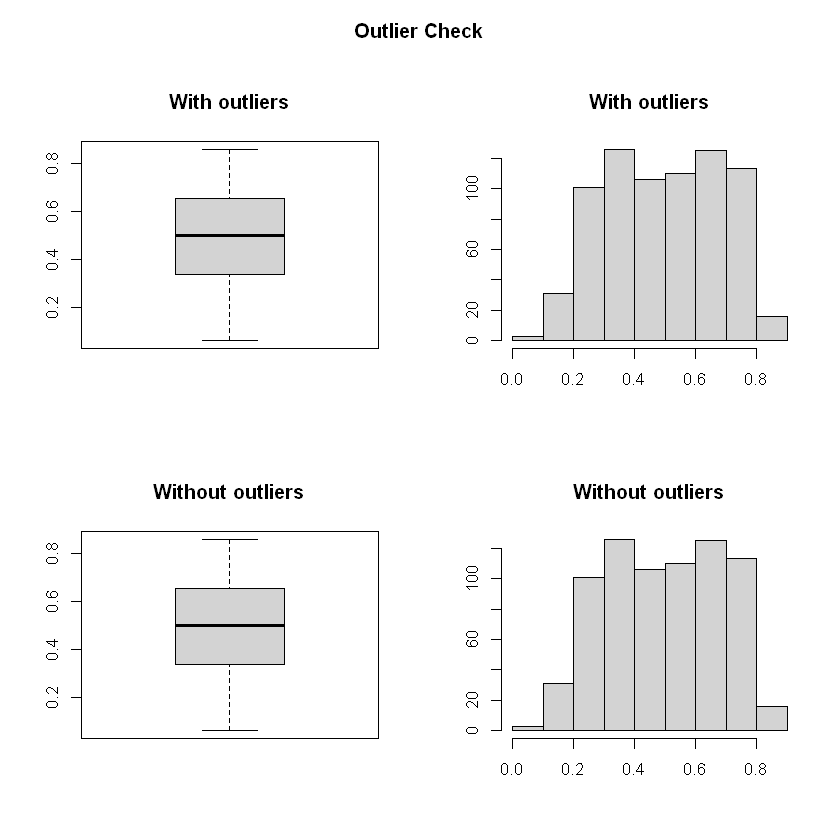

In [12]:
outlierKD(data, temp) #no outliers

Outliers identified: 0 nPropotion (%) of outliers: 0 nMean of the outliers: NaN nMean without removing outliers: 0.47 nMean if we remove outliers: 0.47 n

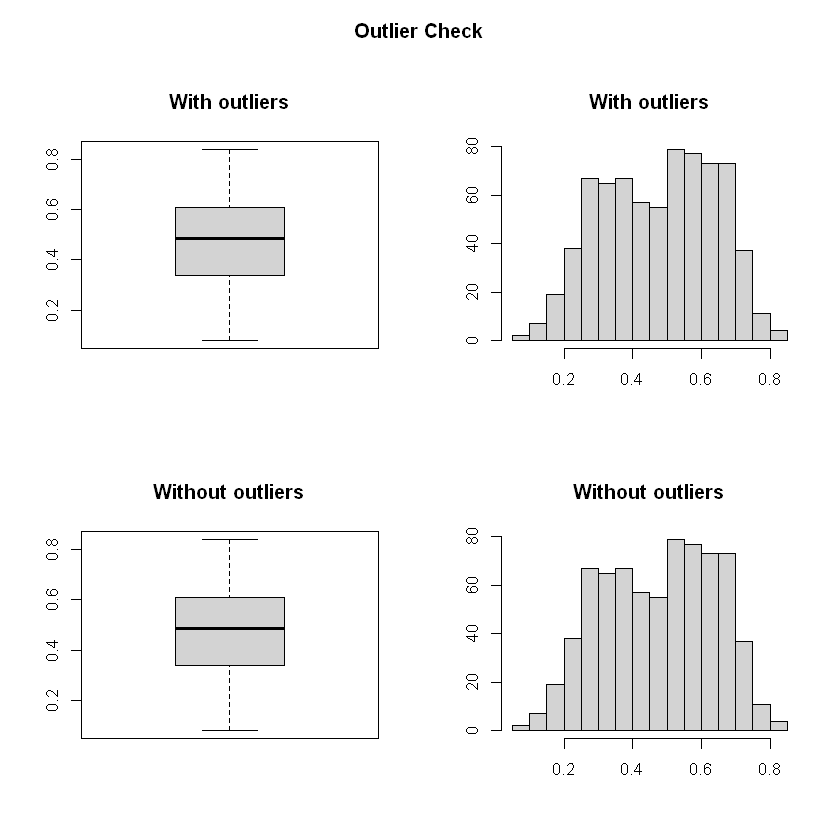

In [13]:
outlierKD(data, atemp) #no outliers

Outliers identified: 2 nPropotion (%) of outliers: 0.3 nMean of the outliers: 0.09 nMean without removing outliers: 0.63 nMean if we remove outliers: 0.63 n

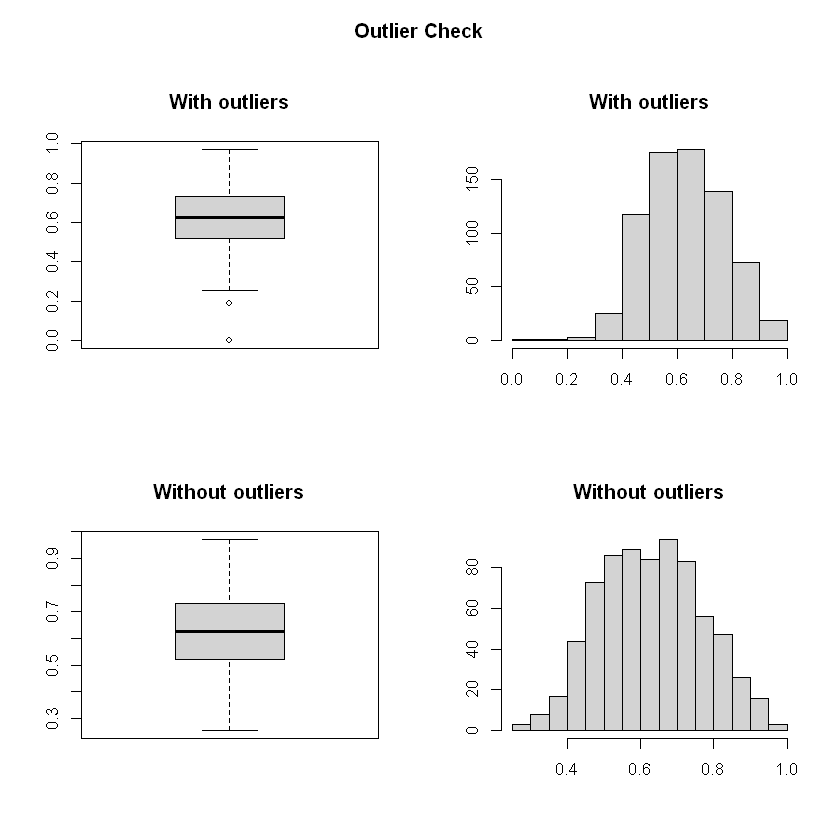

In [14]:
outlierKD(data, hum) # no extreme outlier detected

Outliers identified: 13 nPropotion (%) of outliers: 1.8 nMean of the outliers: 0.42 nMean without removing outliers: 0.19 nMean if we remove outliers: 0.19 n

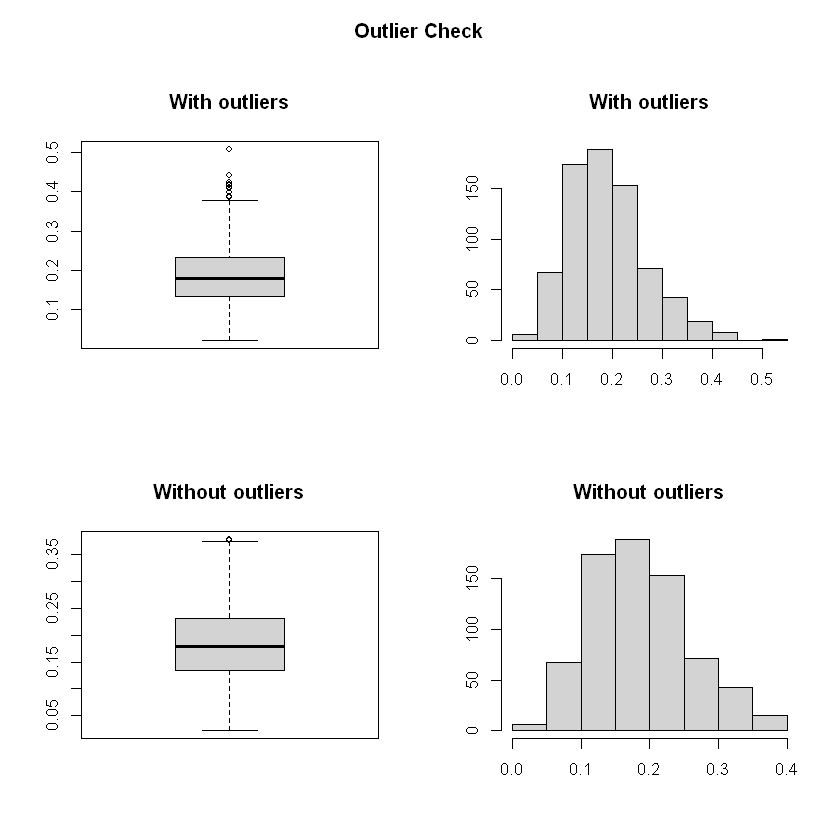

In [15]:
outlierKD(data, windspeed) #some extreme values are present but canot be considered as outlier

Outliers identified: 13 nPropotion (%) of outliers: 1.8 nMean of the outliers: 0.42 nMean without removing outliers: 0.19 nMean if we remove outliers: 0.19 n

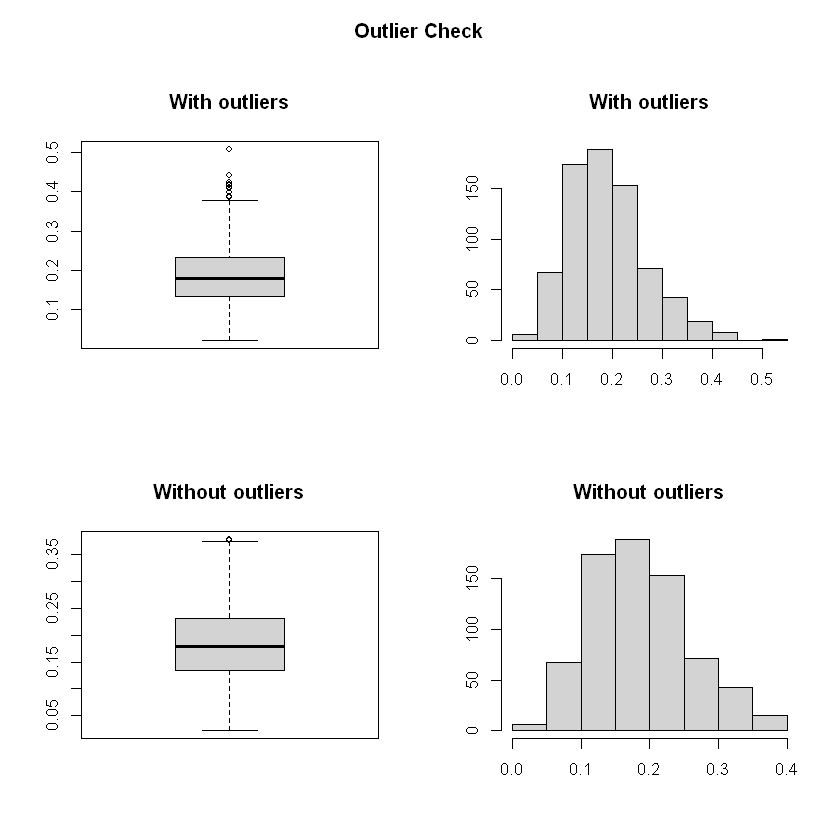

In [16]:
outlierKD(data, windspeed) #some extreme values are present but canot be considered as outlier

Outliers identified: 44 nPropotion (%) of outliers: 6.4 nMean of the outliers: 2661.95 nMean without removing outliers: 848.18 nMean if we remove outliers: 732.01 n

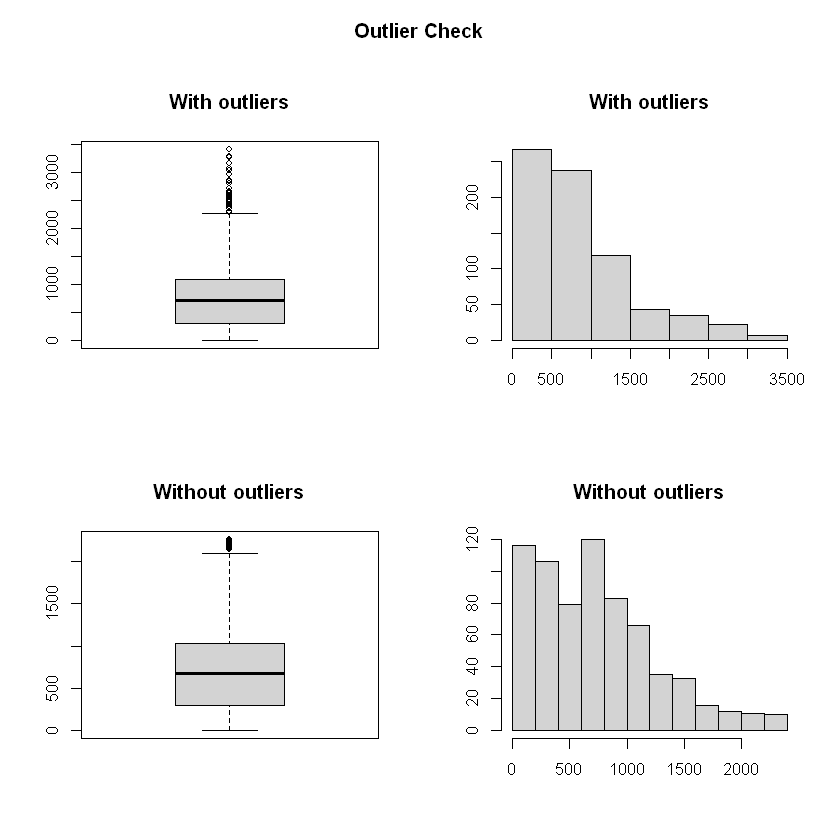

In [17]:
outlierKD(data, casual) # no logical outliers

Outliers identified: 0 nPropotion (%) of outliers: 0 nMean of the outliers: NaN nMean without removing outliers: 3656.17 nMean if we remove outliers: 3656.17 n

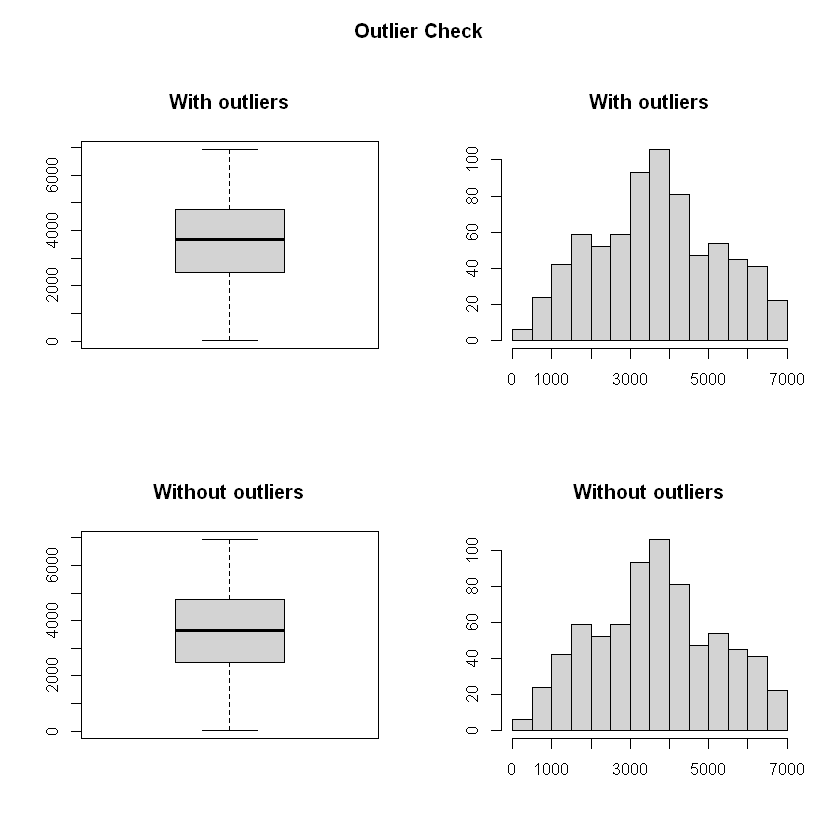

In [18]:
outlierKD(data, registered)# no ouliers

Outliers identified: 0 nPropotion (%) of outliers: 0 nMean of the outliers: NaN nMean without removing outliers: 4504.35 nMean if we remove outliers: 4504.35 n

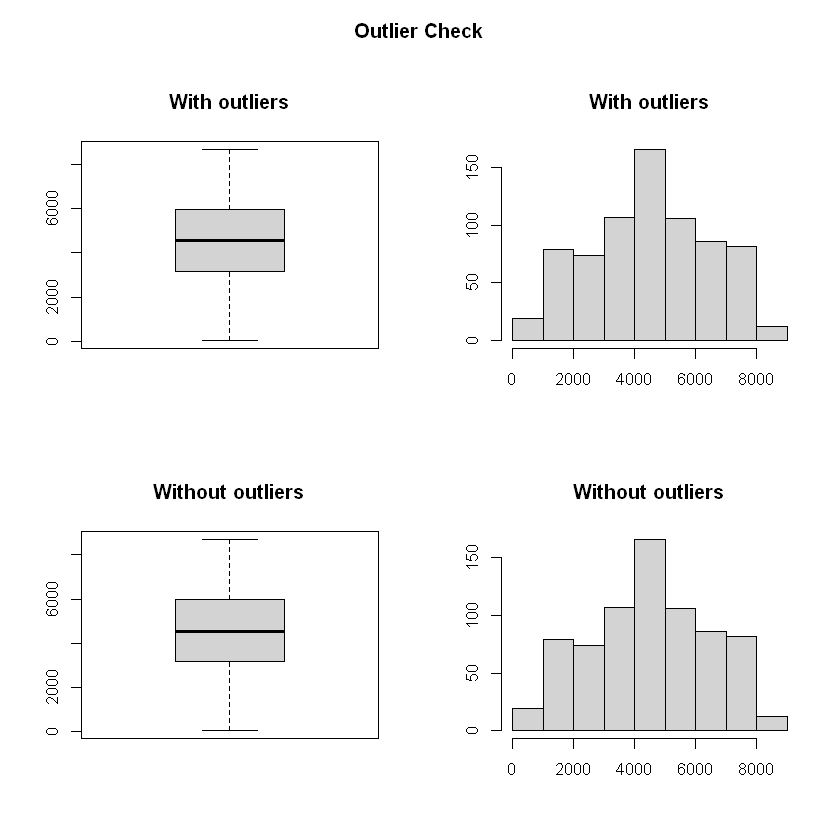

In [19]:
outlierKD(data, cnt)# no ouliers

<h3 style="font-family:serif"> <b r>
    Correlation Analysis                                                      

In [20]:
par(mfrow = c(1, 1))
numeric_predictors <- unlist(lapply(data, is.numeric))
numVarDataset <- data[, numeric_predictors]
corr <- cor(numVarDataset)

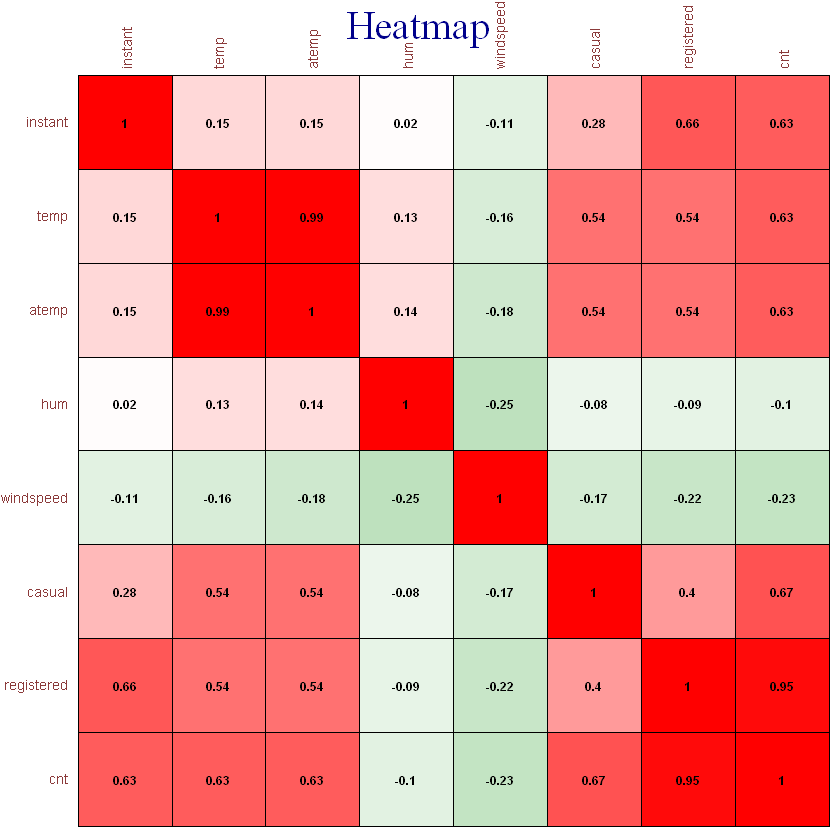

In [21]:
corrplot(
   corr,
   method = "color",
   outline = TRUE,
   cl.pos = 'n',
   rect.col = "black",
   tl.col = "indianred4",
   addCoef.col = "black",
   main="\n\nHeatmap\n", 
   col.main="darkblue", 
   font.main=6,
   cex.main=2,
   number.digits = 2,
   number.cex = 0.60,
   tl.cex = 0.70,
   cl.cex = 1,
   col = colorRampPalette(c("green4", "white", "red"))(100)
)

<h3 style="font-family:serif; font-size:26px"> <b r>
    FINDINGS:</h3>
<h4 style="font-family:serif; font-size:16px"> 
<ol>
    <li>Target variable 'cnt' looks like normal distribution.</li><br>
    <li>Atemp is a variable denoting ambient temperature or it is the amount of temperature felt to be in the surrounding. Hence, the features temp and atemp are highly correlated, thus causing the problem of multicollinearity, as one might expect. So, removing either of them will reduce collinearity issues. We experimented with removing the temp variable, as we believed that atemp would be more relevant for an individual’s decision of renting a bike.</li><br>
    <li>The target variable ‘cnt’ (demand count) has a strong and positive relationship with temperature and ambient temperature (atemp) which is logical. People tend to rent more bikes when temperature is higher.</li><br>
    <li>The target variable ‘cnt’ (demand count) has a negative relationship with hum(humidity) and windspeed. People tend to rent bike more when there is less humidity and wind speed.</li><br>
    <li>Also, the relationship between ‘hum’, ’windspeed’ and ‘cnt’ is very weak. This indicates that these are not very strong predictors.</li>
</ol>
</h4>

Warning message in geom_histogram(aes(y = after_stat(density), binwidth = 0.5, colour = "black")):
"Ignoring unknown aesthetics: binwidth"
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


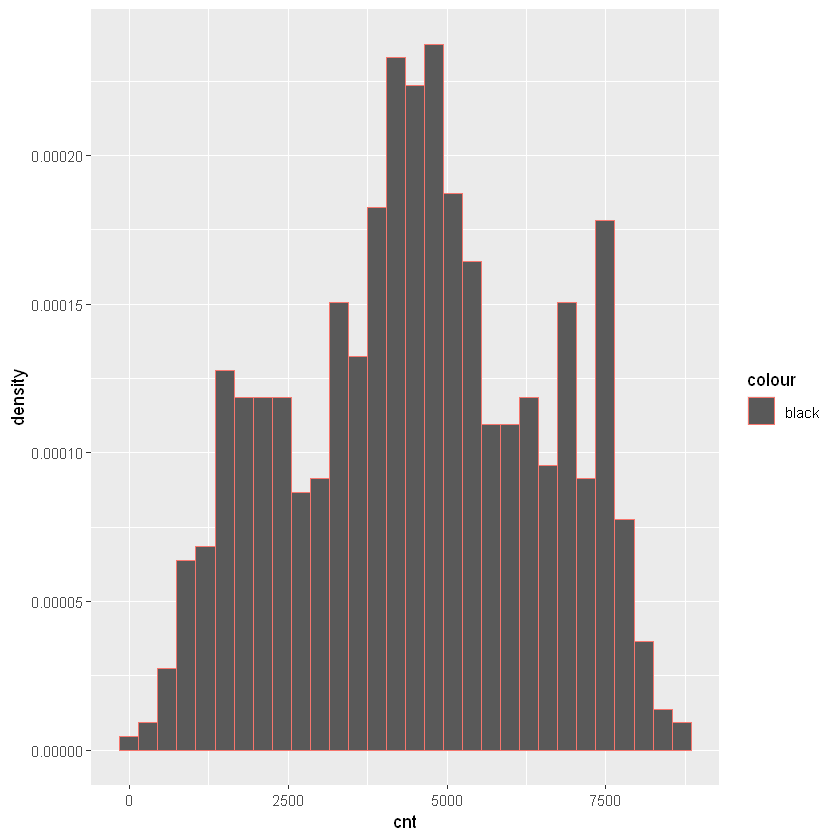

In [22]:
# Looking at target variable
ggplot(data = data, aes(cnt)) +
   geom_histogram(aes(
      y = after_stat(density),
      binwidth = .5,
      colour = "black"
   ))

In [23]:
## Univariate Analysis     
# 1. Continous predictors
univariate_continuous <- function(dataset, variable, variableName) {
   var_name = eval(substitute(variable), eval(dataset))
   print(summary(var_name))
   ggplot(data = dataset, aes(var_name)) +
      geom_histogram(aes(binwidth = .5, colour = "black")) +
      labs(x = variableName) +
      ggtitle(paste("count of", variableName))
}

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
     22    3152    4548    4504    5956    8714 


Warning message in geom_histogram(aes(binwidth = 0.5, colour = "black")):
"Ignoring unknown aesthetics: binwidth"
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


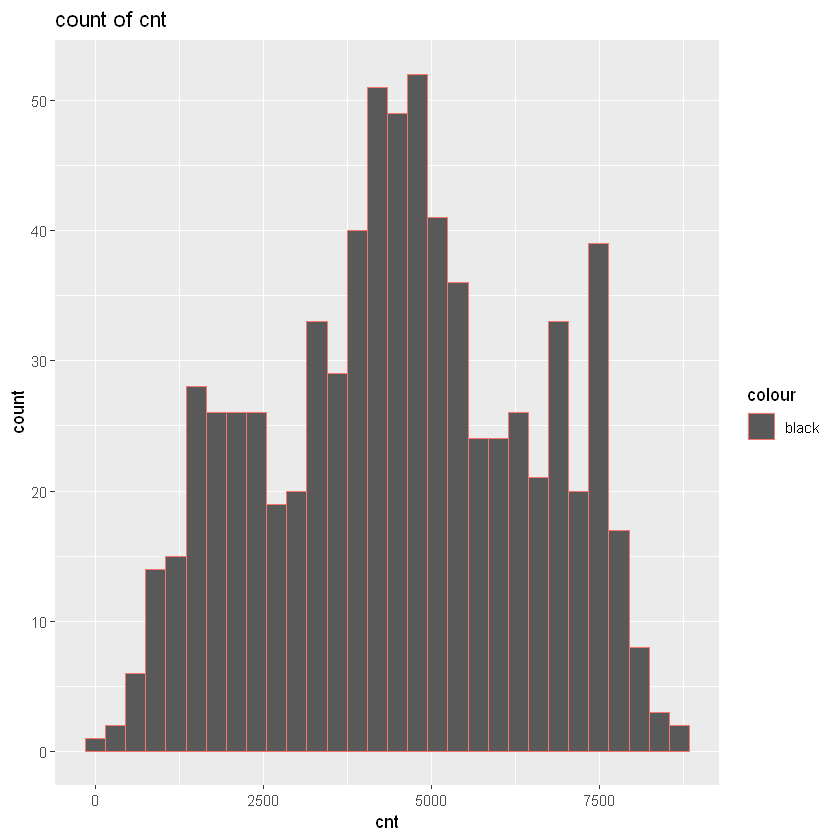

In [24]:
univariate_continuous(data, cnt, "cnt")

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.05913 0.33708 0.49833 0.49538 0.65542 0.86167 


Warning message in geom_histogram(aes(binwidth = 0.5, colour = "black")):
"Ignoring unknown aesthetics: binwidth"
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


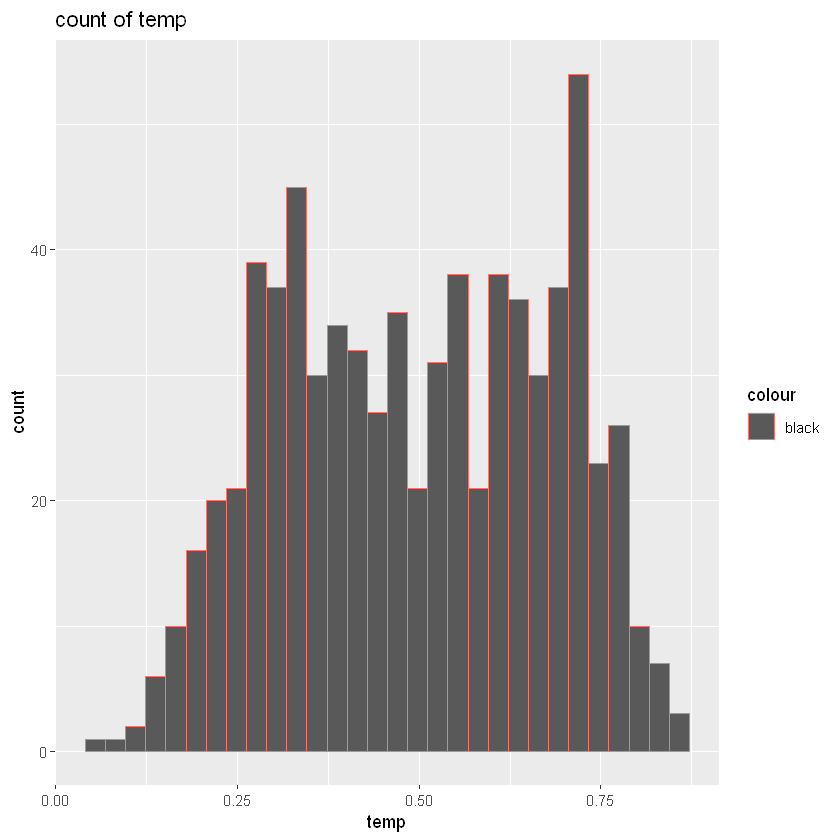

In [25]:
univariate_continuous(data, temp, "temp")

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.07907 0.33784 0.48673 0.47435 0.60860 0.84090 


Warning message in geom_histogram(aes(binwidth = 0.5, colour = "black")):
"Ignoring unknown aesthetics: binwidth"
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


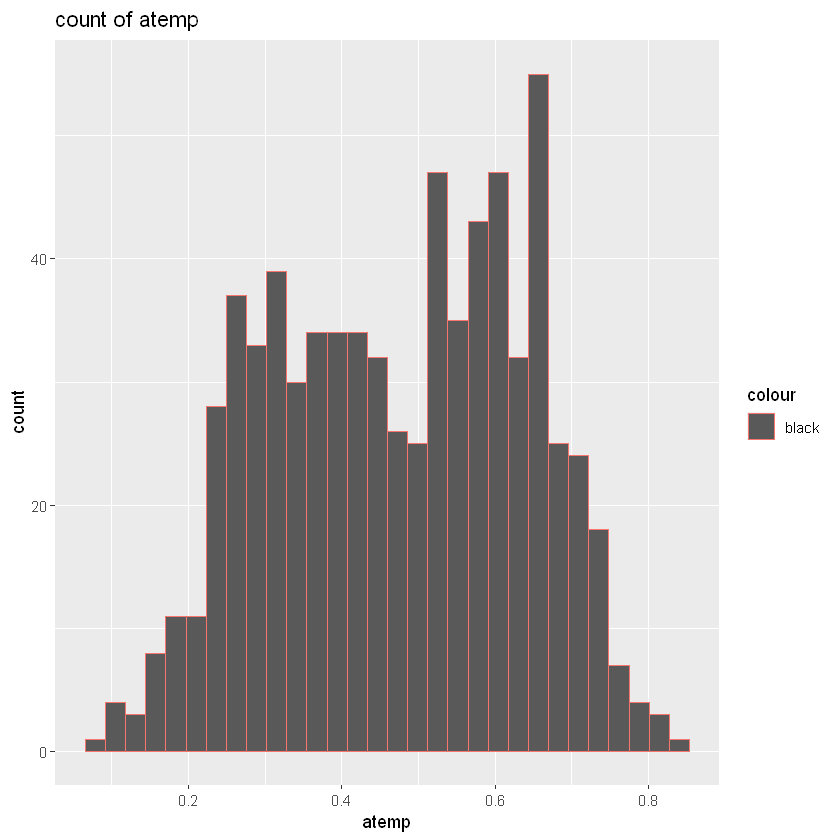

In [26]:
univariate_continuous(data, atemp, "atemp")

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.5200  0.6267  0.6279  0.7302  0.9725 


Warning message in geom_histogram(aes(binwidth = 0.5, colour = "black")):
"Ignoring unknown aesthetics: binwidth"
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


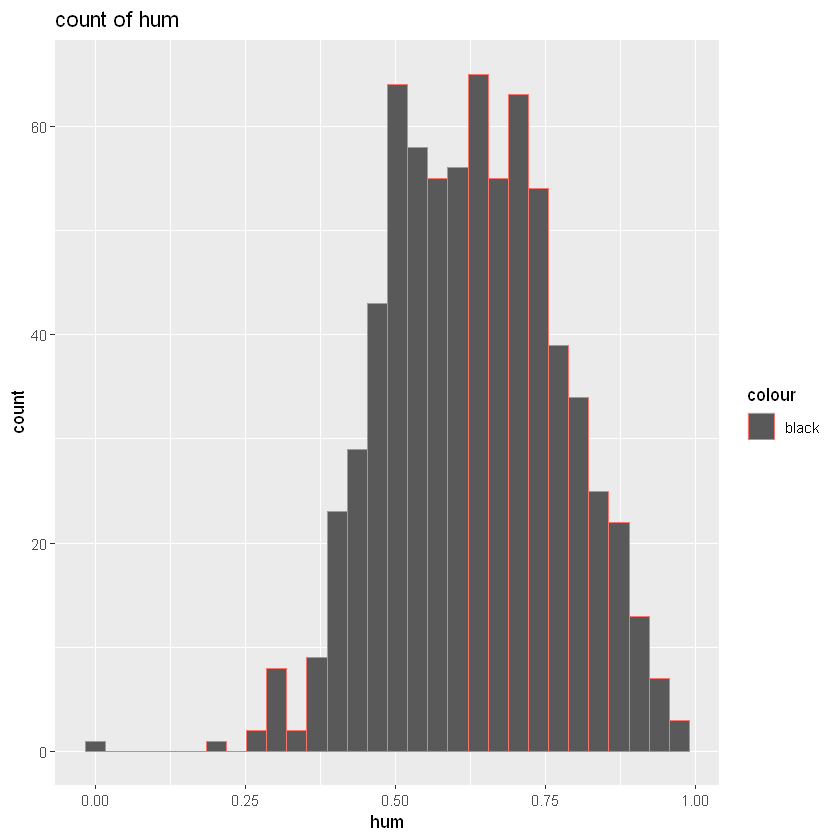

In [27]:
univariate_continuous(data, hum, "hum") # skwed towards left

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.02239 0.13495 0.18097 0.19049 0.23321 0.50746 


Warning message in geom_histogram(aes(binwidth = 0.5, colour = "black")):
"Ignoring unknown aesthetics: binwidth"
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


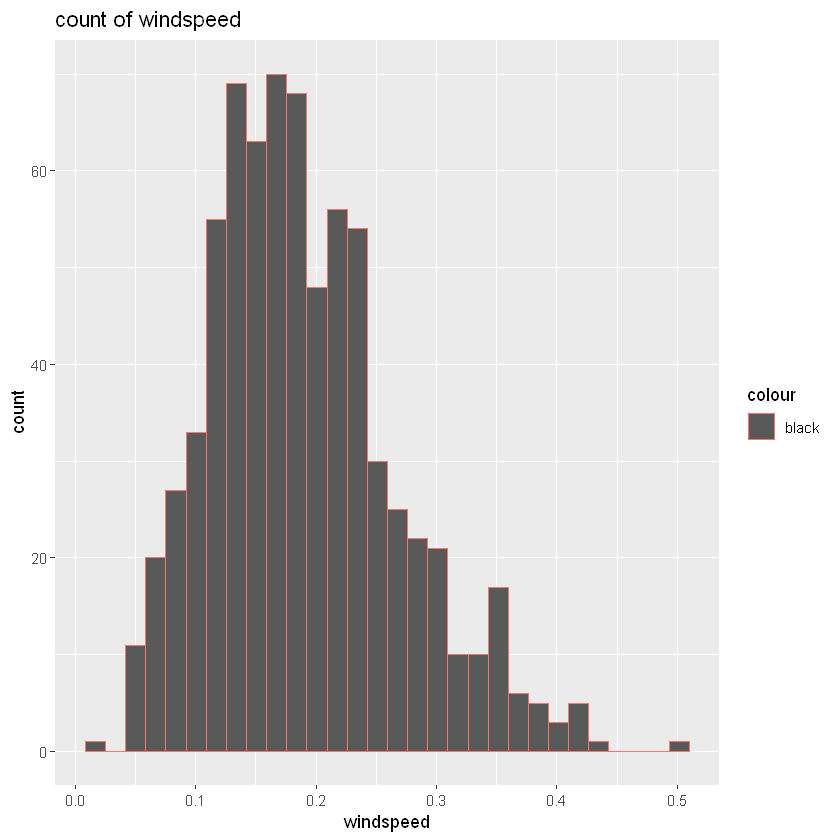

In [28]:
univariate_continuous(data, windspeed, "windspeed") #skewed towards right

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    2.0   315.5   713.0   848.2  1096.0  3410.0 


Warning message in geom_histogram(aes(binwidth = 0.5, colour = "black")):
"Ignoring unknown aesthetics: binwidth"
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


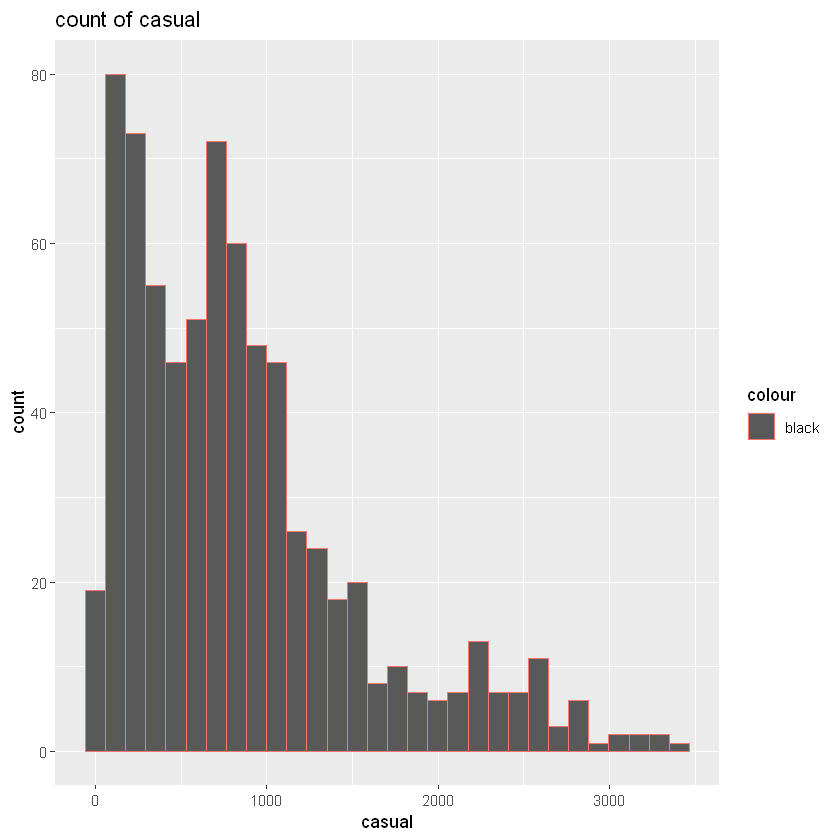

In [29]:
univariate_continuous(data, casual, "casual") # skwed towards right

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
     20    2497    3662    3656    4776    6946 


Warning message in geom_histogram(aes(binwidth = 0.5, colour = "black")):
"Ignoring unknown aesthetics: binwidth"
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


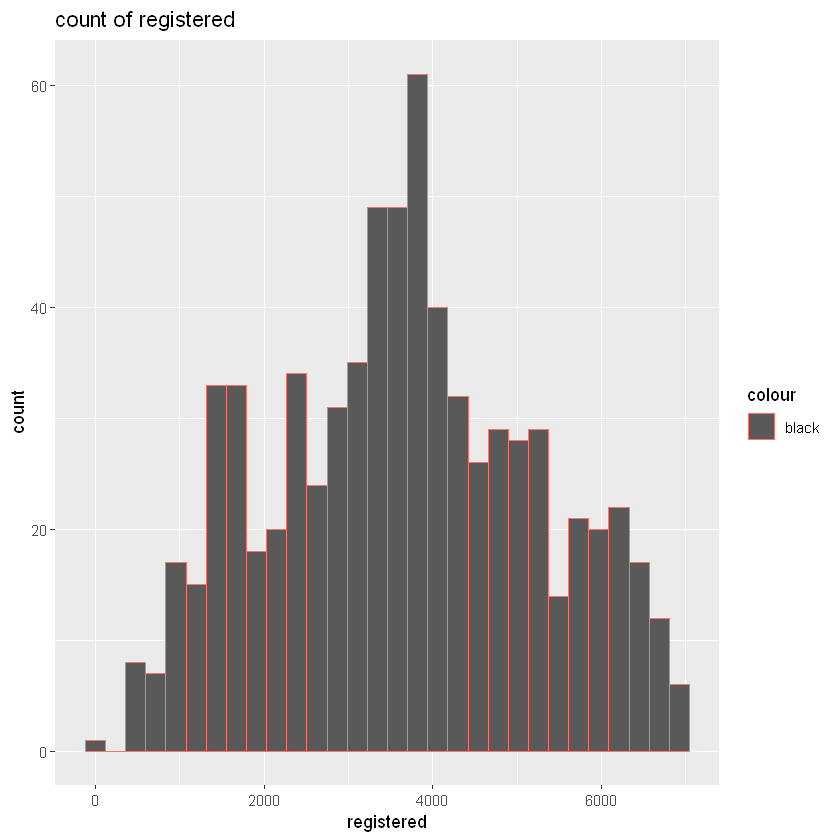

In [30]:
univariate_continuous(data, registered, "registered")

In [31]:
# removing instant and dteday

In [32]:
data$instant <- NULL
data$dteday <- NULL
data$casual <- NULL
data$registered <- NULL

<h3 style="font-family:serif"> <b r>
    Feature scaling or Normalization                             

In [33]:
scaledData <- normalizeFeatures(data,'cnt')

In [34]:
# Function for calculating Mean Absolute Error
MAE <- function(actual,predicted){
   error = actual - predicted
   mean(abs(error))
}

<h3 style= "font-family:serif; font-size:26px"><b r>
Regression Modelling </h3>
<h4 style= "font-family:serif; font-size:16px"><br>
<ol>
    In bike renting case study, the target variable 'cnt' is continuous in nature. Our task is predicting the bike demand on a single day. This makes it a regression problem. Two machine learning algorithms were used for learning. <br><br>
<li>Multivariate linear regression </li><br>
<li>Random forest regressor – an ensemble tree based regression that combines a large number of decision-tree models, each individually built on bootstrapped samples of the data. This process of bootstrapping the data and combining the individual decision-trees will reduce the variance of the predictions without increasing the bias. The final predictions will be based on the mean of the individual decision-tree predictions.</li>


<h3 style="font-family:serif"> <b r>
    Model 1: Linear Regression 

In [35]:
set.seed(654)
split <- sample.split(data$cnt, SplitRatio = 0.70)
training_set <- subset(data, split == TRUE)
test_set <- subset(data, split == FALSE)

In [36]:
model1 <- lm(cnt ~ ., data = training_set)

In [37]:
summary(model1)


Call:
lm(formula = cnt ~ ., data = training_set)

Residuals:
    Min      1Q  Median      3Q     Max 
-3518.4  -351.7    63.2   426.9  2439.2 

Coefficients: (1 not defined because of singularities)
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       1465.98     296.99   4.936 1.10e-06 ***
seasonsummer      1052.92     199.53   5.277 1.99e-07 ***
seasonfall        1090.08     243.02   4.486 9.10e-06 ***
seasonwinter      1739.77     209.32   8.312 9.69e-16 ***
yr2012            2056.81      68.91  29.846  < 2e-16 ***
mnth2              207.30     170.46   1.216 0.224539    
mnth3              505.95     195.71   2.585 0.010026 *  
mnth4              468.06     284.54   1.645 0.100636    
mnth5              914.46     310.98   2.941 0.003433 ** 
mnth6              695.86     331.01   2.102 0.036053 *  
mnth7               74.15     371.79   0.199 0.842003    
mnth8              537.96     360.50   1.492 0.136280    
mnth9              954.10     310.59   3.072 0

In [38]:
# step wise model selection
modelAIC <- stepAIC(model1, direction = "both")
summary(modelAIC)

Start:  AIC=6800.56
cnt ~ season + yr + mnth + holiday + weekday + workingday + weathersit + 
    temp + atemp + hum + windspeed


Step:  AIC=6800.56
cnt ~ season + yr + mnth + holiday + weekday + weathersit + temp + 
    atemp + hum + windspeed

             Df Sum of Sq       RSS    AIC
- atemp       1    604568 275309771 6799.7
<none>                    274705203 6800.6
- temp        1   1680528 276385731 6801.7
- holiday     1   2541499 277246702 6803.3
- weekday     6   8931824 283637028 6804.9
- hum         1   8547280 283252484 6814.2
- windspeed   1  15775500 290480703 6827.1
- mnth       11  38792108 313497311 6846.1
- weathersit  2  43451067 318156270 6871.6
- season      3  45689214 320394417 6873.2
- yr          1 507678731 782383934 7333.4

Step:  AIC=6799.69
cnt ~ season + yr + mnth + holiday + weekday + weathersit + temp + 
    hum + windspeed

             Df Sum of Sq       RSS    AIC
<none>                    275309771 6799.7
+ atemp       1    604568 274705203 6800.6


Call:
lm(formula = cnt ~ season + yr + mnth + holiday + weekday + weathersit + 
    temp + hum + windspeed, data = training_set)

Residuals:
    Min      1Q  Median      3Q     Max 
-3479.9  -351.7    71.3   425.4  2418.5 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       1514.61     293.24   5.165 3.52e-07 ***
seasonsummer      1058.45     199.47   5.306 1.71e-07 ***
seasonfall        1092.89     243.02   4.497 8.63e-06 ***
seasonwinter      1740.57     209.33   8.315 9.41e-16 ***
yr2012            2054.43      68.88  29.826  < 2e-16 ***
mnth2              211.07     170.44   1.238 0.216161    
mnth3              505.08     195.72   2.581 0.010158 *  
mnth4              471.39     284.54   1.657 0.098240 .  
mnth5              897.34     310.55   2.889 0.004032 ** 
mnth6              667.54     329.89   2.024 0.043568 *  
mnth7               53.63     371.28   0.144 0.885217    
mnth8              488.20     357.27   1.366 0.172427    
mnth9  

<h3 style="font-family:serif"> <b r>
    Apply prediction on test set

In [39]:
test_prediction <- predict(modelAIC, newdata = test_set)
test_rmse <- rmse(test_set$cnt, test_prediction)
print(paste("root-mean-square error for linear regression model is ", test_rmse))
print(paste("Mean Absolute Error for linear regression model is ",MAE(test_set$cnt,test_prediction)))

[1] "root-mean-square error for linear regression model is  821.372628075881"
[1] "Mean Absolute Error for linear regression model is  575.459501759831"


In [40]:
print("summary of predicted count values")
summary(test_prediction)
print("summary of actual count values")
summary(test_set$cnt)

[1] "summary of predicted count values"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  -1334    3543    4716    4547    5903    7889 

[1] "summary of actual count values"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    506    3112    4650    4550    5949    8395 

<h3 style="font-family:serif"> <b r>
    Model 2: stepAIC Model </h3>

In [41]:
# From the summary we can observe negative prediction values
#We will perform log transformation of trarget variable
model2 <- lm(log(cnt)~., data = training_set)

In [42]:
stepwiseLogAICModel <- stepAIC(model2,direction = "both")
test_prediction_log<- predict(stepwiseLogAICModel, newdata = test_set)
predict_test_nonlog <- exp(test_prediction_log)

Start:  AIC=-1172.01
log(cnt) ~ season + yr + mnth + holiday + weekday + workingday + 
    weathersit + temp + atemp + hum + windspeed


Step:  AIC=-1172.01
log(cnt) ~ season + yr + mnth + holiday + weekday + weathersit + 
    temp + atemp + hum + windspeed

             Df Sum of Sq    RSS      AIC
- weekday     6    0.6975 46.728 -1176.32
- atemp       1    0.0220 46.053 -1173.77
<none>                    46.031 -1172.01
- holiday     1    0.3205 46.351 -1170.46
- temp        1    0.4928 46.523 -1168.57
- mnth       11    2.8682 48.899 -1163.12
- hum         1    1.3827 47.413 -1158.89
- windspeed   1    2.0611 48.092 -1151.63
- season      3    5.9065 51.937 -1116.32
- weathersit  2    9.1973 55.228 -1082.92
- yr          1   24.7937 70.824  -953.82

Step:  AIC=-1176.32
log(cnt) ~ season + yr + mnth + holiday + weathersit + temp + 
    atemp + hum + windspeed

             Df Sum of Sq    RSS      AIC
- atemp       1    0.0075 46.736 -1178.24
<none>                    46.728 -1176.3

In [43]:
test_rmse2 <- rmse(test_set$cnt, predict_test_nonlog)
print(paste("root-mean-square error between actual and predicted", test_rmse))
print(paste("Mean Absolute Error for linear regression model is ",
            MAE(test_set$cnt,predict_test_nonlog)))

[1] "root-mean-square error between actual and predicted 821.372628075881"
[1] "Mean Absolute Error for linear regression model is  696.180959982147"


In [44]:
summary(predict_test_nonlog)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    486    3063    4381    4484    5822   10614 

In [45]:
summary(test_set$cnt)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    506    3112    4650    4550    5949    8395 

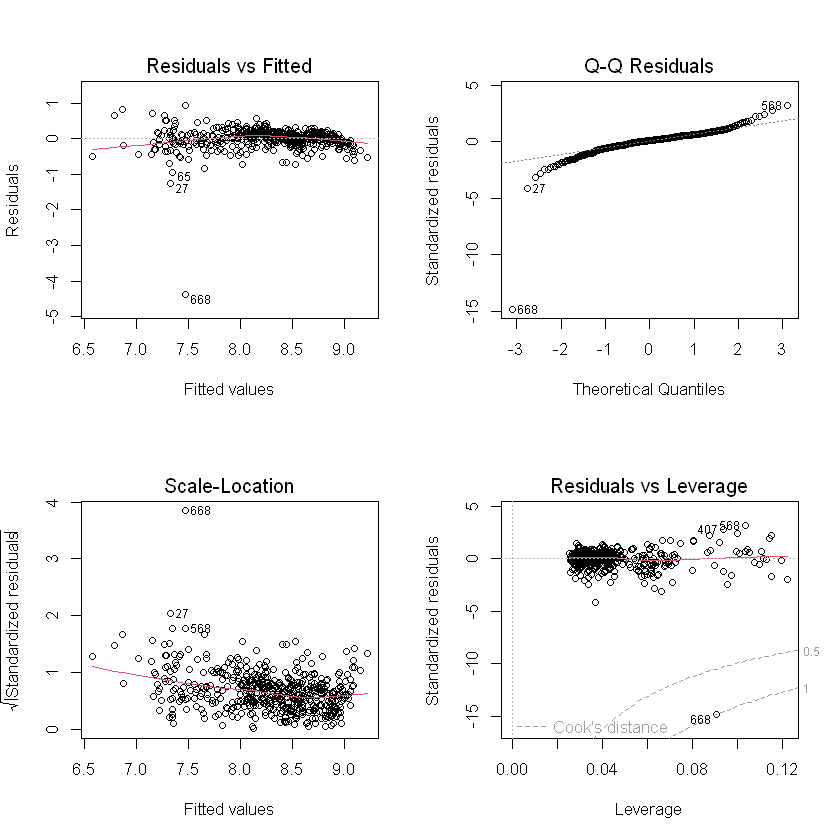

In [46]:
par(mfrow = c(2, 2))
plot(stepwiseLogAICModel)

<h3 style="font-family:serif; font-size:26px"> <b r><br>
    Model 3: Random forest 
<h4 style="font-family:serif; font-size:16px">
    After linear regression, random forest was trained. After training with default setting, hyperparameter tuning was used for increase performance.<br><br>
    First random forest model was trained ‘rf_model_1’ with default setting. 
</h4>

In [47]:
rf_model_1 <- randomForest(cnt ~., data = training_set,ntree = 500, mtry = 8, importance = TRUE)

In [48]:
print(rf_model_1)


Call:
 randomForest(formula = cnt ~ ., data = training_set, ntree = 500,      mtry = 8, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 8

          Mean of squared residuals: 451064
                    % Var explained: 87.92


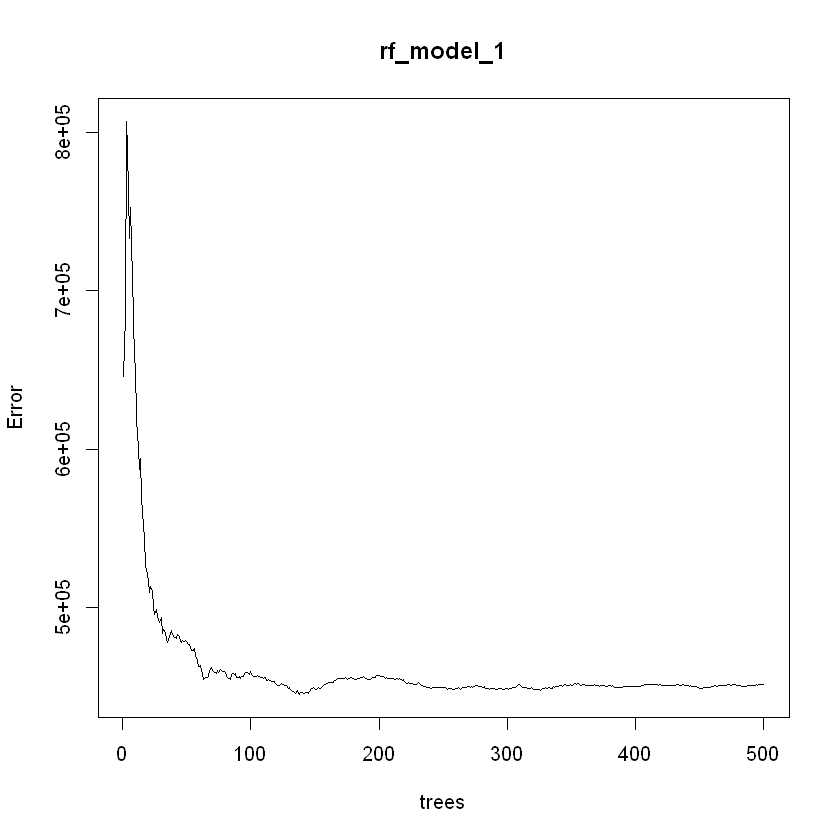

In [49]:
par(mfrow = c(1,1))
plot(rf_model_1)

mtry = 3  OOB error = 473628.2 
Searching left ...
mtry = 6 	OOB error = 460684.7 
0.02732842 0.05 
Searching right ...
mtry = 1 	OOB error = 988371.6 
-1.086809 0.05 


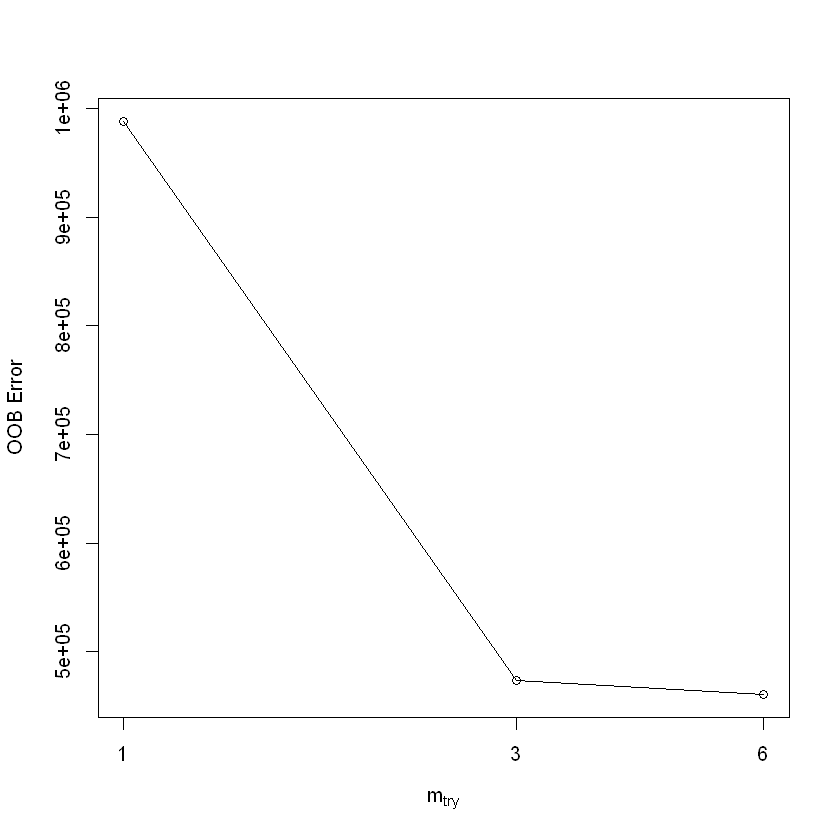

In [51]:
# 300 trees selected from the plot
tumedmodel <- tuneRF(training_set[,1:11], training_set[,12], stepFactor = 0.5, plot = TRUE, 
                     ntreeTry = 250, trace = TRUE, improve = 0.05)

In [52]:
# selected mtry = 6 from the plot
tuned_randomForest <-  randomForest(cnt ~. - atemp, data = training_set,ntree = 250, mtry = 6, importance = TRUE)
tuned_randomForest


Call:
 randomForest(formula = cnt ~ . - atemp, data = training_set,      ntree = 250, mtry = 6, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 250
No. of variables tried at each split: 6

          Mean of squared residuals: 457193.6
                    % Var explained: 87.76

In [53]:
# predicting using random forest model 1
rf1_prediction <- predict(tuned_randomForest,test_set[,-12])
rmse(rf1_prediction,test_set$cnt)
print(paste("Mean Absolute Error for Random forest regressor  is ", MAE(test_set$cnt,rf1_prediction)))

[1] 752.1771

[1] "Mean Absolute Error for Random forest regressor  is  502.034311212121"


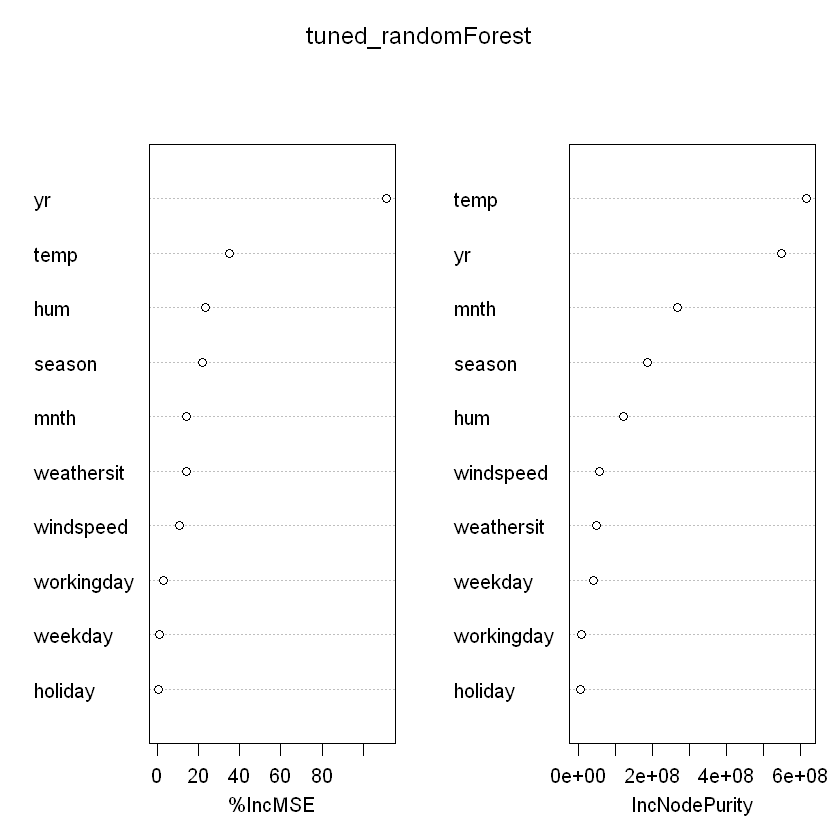

In [54]:
#745
varImpPlot(tuned_randomForest)

<h3 style="font-family:serif; font-size:26px"> <b r>
Conclusion</h3>
<h4 style="font-family:serif; font-size:16px">
<ol>
    <li>Using different combinations of models and featurizations, we found that hour is by far the most predictive feature for our problem, whereas weather variables play a much smaller, but still noticeable effect in contributing to accurate predictions.</li><br><br>
    <li>We found that hour was by far the most important variable in our data, and contributed to the predictions significantly – this is quite reasonable as certain hours (peak hours) will clearly have significantly more bike rentals than other hours. </li><br><br>
    <li>In addition, the weather variables also had a small, but still positive, effect on our predictions. This indicates that weather can indeed help predict demand for bikes.</li><br><br>
    <li>Random forest performed better than linear regression. After hypertuning the parameters, slight improvement was recorded on variance explained. </li><br><br>
